<a href="https://colab.research.google.com/github/ctwenty1/Complete-Python-3-Bootcamp/blob/master/finalprogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

installing several packages...

In [ ]:
!sudo apt -y install libportaudio2  # Only needed for audio input, only install first time. 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  libportaudio2
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 65.4 kB of archives.
After this operation, 223 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 libportaudio2 amd64 19.6.0-1build1 [65.4 kB]
Fetched 65.4 kB in 0s (437 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 122352 

In [ ]:
!pip install -q tflite-model-maker  # Only install it the first time. 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 577.3/577.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.6/128.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.6/240.6 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.0/128.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 25.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.8/203.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.9/840.9 kB 29.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.0/591.0 kB 28.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━

Importing the required packages...

In [ ]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
/usr/local/lib/python3.9/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.10.0 and strictly below 2.13.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're usin

RuntimeError: ignored

Getting data...

In [ ]:
!gdown 1E5E6DRkoKIIi67lgzLz6CFbOSg1R_CA0 # file size ~2.74G, ~46 seconds dependent on internet speed

Downloading...
From: https://drive.google.com/uc?id=1E5E6DRkoKIIi67lgzLz6CFbOSg1R_CA0
To: /content/moneybills.zip
100% 2.74G/2.74G [00:31<00:00, 86.3MB/s]


In [ ]:
!rm -rf moneybills

In [ ]:
import zipfile

# Extract the archive
local_zip = './moneybills.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./')
zip_ref.close()

# local_zip = './rps.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('tmp/rps-train')
# zip_ref.close()

# local_zip = './rps-test-set.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('tmp/rps-test')
# zip_ref.close()

In [ ]:
image_path = '/content/moneybills'  # this is the training data path. Replace it with the path of your data folder

In [ ]:
# import os
import shutil
import random

parent_folder = image_path
subfolders = [os.path.join(parent_folder, f) for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]

# Count the number of files in each subfolder
num_files = []
print(subfolders)

['/content/moneybills/5', '/content/moneybills/20', '/content/moneybills/10', '/content/moneybills/50', '/content/moneybills/1', '/content/moneybills/100']


Image pre-processing...

In [ ]:
###################################################################
# Removing non-compatible images
# resize image to size (300, 300) that  can be customized
# and convert to .jpg format
# running takes ~ 4m 48s
##################################################################
from PIL import Image
# import os

# set the desired size
size = (300, 300)
n_removed = 0  
for subfolder in subfolders:
    num_files.append(len(os.listdir(subfolder)))
    # set the path to the folder containing the images
    path = subfolder
    
    # loop through each file in the folder
    for file_name in os.listdir(path):
        # check if file has a valid extension
        valid_extensions = ('.jpeg', '.jpg', '.png', '.bmp','gif')
        file_extension = os.path.splitext(file_name)[1].lower()
        if file_extension in valid_extensions:
            # open the image file
            img_path = os.path.join(path, file_name)
            img = Image.open(img_path)

            # resize the image
            img = img.resize(size)

            # delete the old image file
            os.remove(img_path)

            # convert the image to JPG format and save it
            new_path = os.path.splitext(img_path)[0] + ".jpeg"
            img.save(new_path, "JPEG")
        else:
          img_path = os.path.join(path, file_name)
          os.remove(img_path)
          n_removed += 1


# Find the subfolder with the most files
max_files = max(num_files)

print(num_files) 
# [$50, $10, $1, $100, $20, $5]
# [181, 87, 30, 200, 200, 142]
print(max_files)
# 200
print("number of files removed:", n_removed)

[142, 200, 87, 181, 30, 200]
200
number of files removed: 1


In [ ]:
# Copy files randomly from each subfolder until they all have the same number of files
for i, subfolder in enumerate(subfolders):
    files = os.listdir(subfolder)
    num_files_in_subfolder = len(files)
    if num_files_in_subfolder < max_files:
        # Copy random files until the number of files in the subfolder matches the maximum number of files
        num_to_copy = max_files - num_files_in_subfolder
        for j in range(num_to_copy):
            file_to_copy = random.choice(files)

            # generate a new name for the copied file
            file_ext = os.path.splitext(file_to_copy)[1]
            new_file_name = f"copied_file_{j}_{num_to_copy}{file_ext}"
        
        # copy the file to the current subfolder with the new name
            dest_file_path = os.path.join(subfolder, new_file_name)

            shutil.copy(os.path.join(subfolder, file_to_copy), dest_file_path)

In [ ]:
# Now recheck the number of files in each subfolder
parent_folder = image_path
subfolders = [os.path.join(parent_folder, f) for f in os.listdir(parent_folder) if os.path.isdir(os.path.join(parent_folder, f))]

# Count the number of files in each subfolder
num_files = []
for subfolder in subfolders:
    num_files.append(len(os.listdir(subfolder)))
    # set the path to the folder containing the images
    
# Find the subfolder with the most files
max_files = max(num_files)
print(num_files) 
print(max_files)

[200, 200, 200, 200, 200, 200]
200


Running the example...

In [ ]:
data = DataLoader.from_folder(image_path)
# train_data, val_data = data.split(0.9)
# # train_data = DataLoader.from_folder(image_path)
# test_data = DataLoader.from_folder('/content/tmp/rps-test/rps-test-set') 

In [ ]:
train_data, rest_data = data.split(0.8)
val_data, test_data = rest_data.split(0.5)

Showing 25 images...

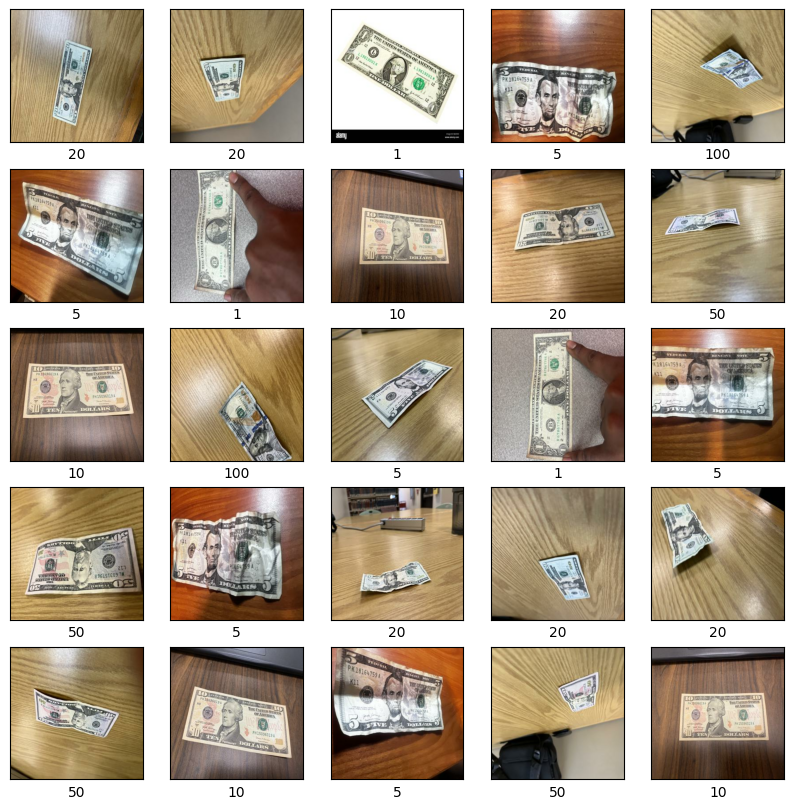

In [ ]:
data=train_data
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

Customizing the TensorFlow model...

In [ ]:
## model_spec default is 'efficientnet_lite0'
model = image_classifier.create(train_data,validation_data=val_data, \
                                model_spec=model_spec.get('efficientnet_lite0'), \
                                use_augmentation=True,   #  default: False. whether use data augmentation
                                epochs=5)   # deault epochs=5. 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 6)                 7686      
                                                                 
Total params: 3,420,710
Trainable params: 7,686
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5
30/30 [==============================] - 40s 1s/step - loss: 1.3722 - accuracy: 0.5094 - val_loss: 0.9114 - val_accuracy: 0.7667
Epoch 2/5
30/30 [==============================] - 36s 1s/step - loss: 0.9343 - accuracy: 0.7437

CHANGING MODELS

In [ ]:
## To change to mobilenet_v2, uncomment the next line
# model = image_classifier.create(train_data, \
# model_spec=model_spec.get('mobilenet_v2'), validation_data=val_data,\
# use_augmentation=True,    #  default: False. whether use data augmentation
# epoch =5) 

## To change to resnet50, uncomment the next line
# model = image_classifier.create(train_data, \
#           model_spec=model_spec.get('resnet_50'), validation_data=val_data,
#           use_augmentation=True,    #  default: False. whether use data augmentation
# epoch =5) 

# # To use InceptionV3 model, uncomment the codes below
# inception_v3_spec = image_classifier.ModelSpec(
#     uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
# inception_v3_spec.input_image_shape = [299, 299]
# model = image_classifier.create(train_data, \
#         model_spec=inception_v3_spec, validation_data=val_data,
#         use_augmentation=True,    #  default: False. whether use data augmentation
#         epoch =5) 



Evaluating performance before converting to TFLite format.

In [ ]:
loss, accuracy = model.evaluate(test_data)

4/4 [==============================] - 4s 851ms/step - loss: 0.6525 - accuracy: 0.9500




Step 4. Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with metadata which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

You could download it in the left sidebar same as the uploading part for your own use.


In [ ]:
# model.export(export_dir='.')
# specifiy the export file name) 
model.export(export_dir='.', tflite_filename='money_effnet0.tflite', \
             label_filename='money_labels_effnet0.txt', \
                export_format=[ExportFormat.LABEL, ExportFormat.TFLITE])

/usr/local/lib/python3.9/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Viewing the learning curve...

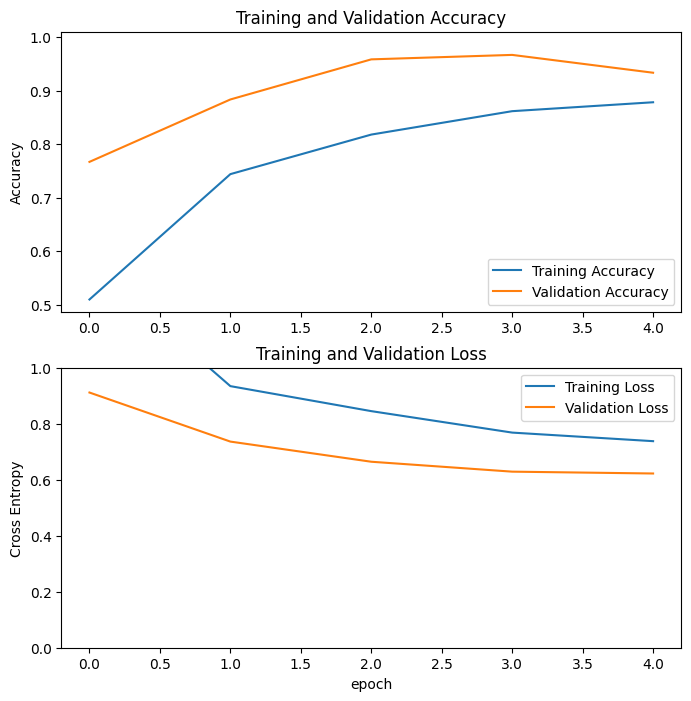

In [ ]:
hist=model.history

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1.01])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

Viewing the classification examples...

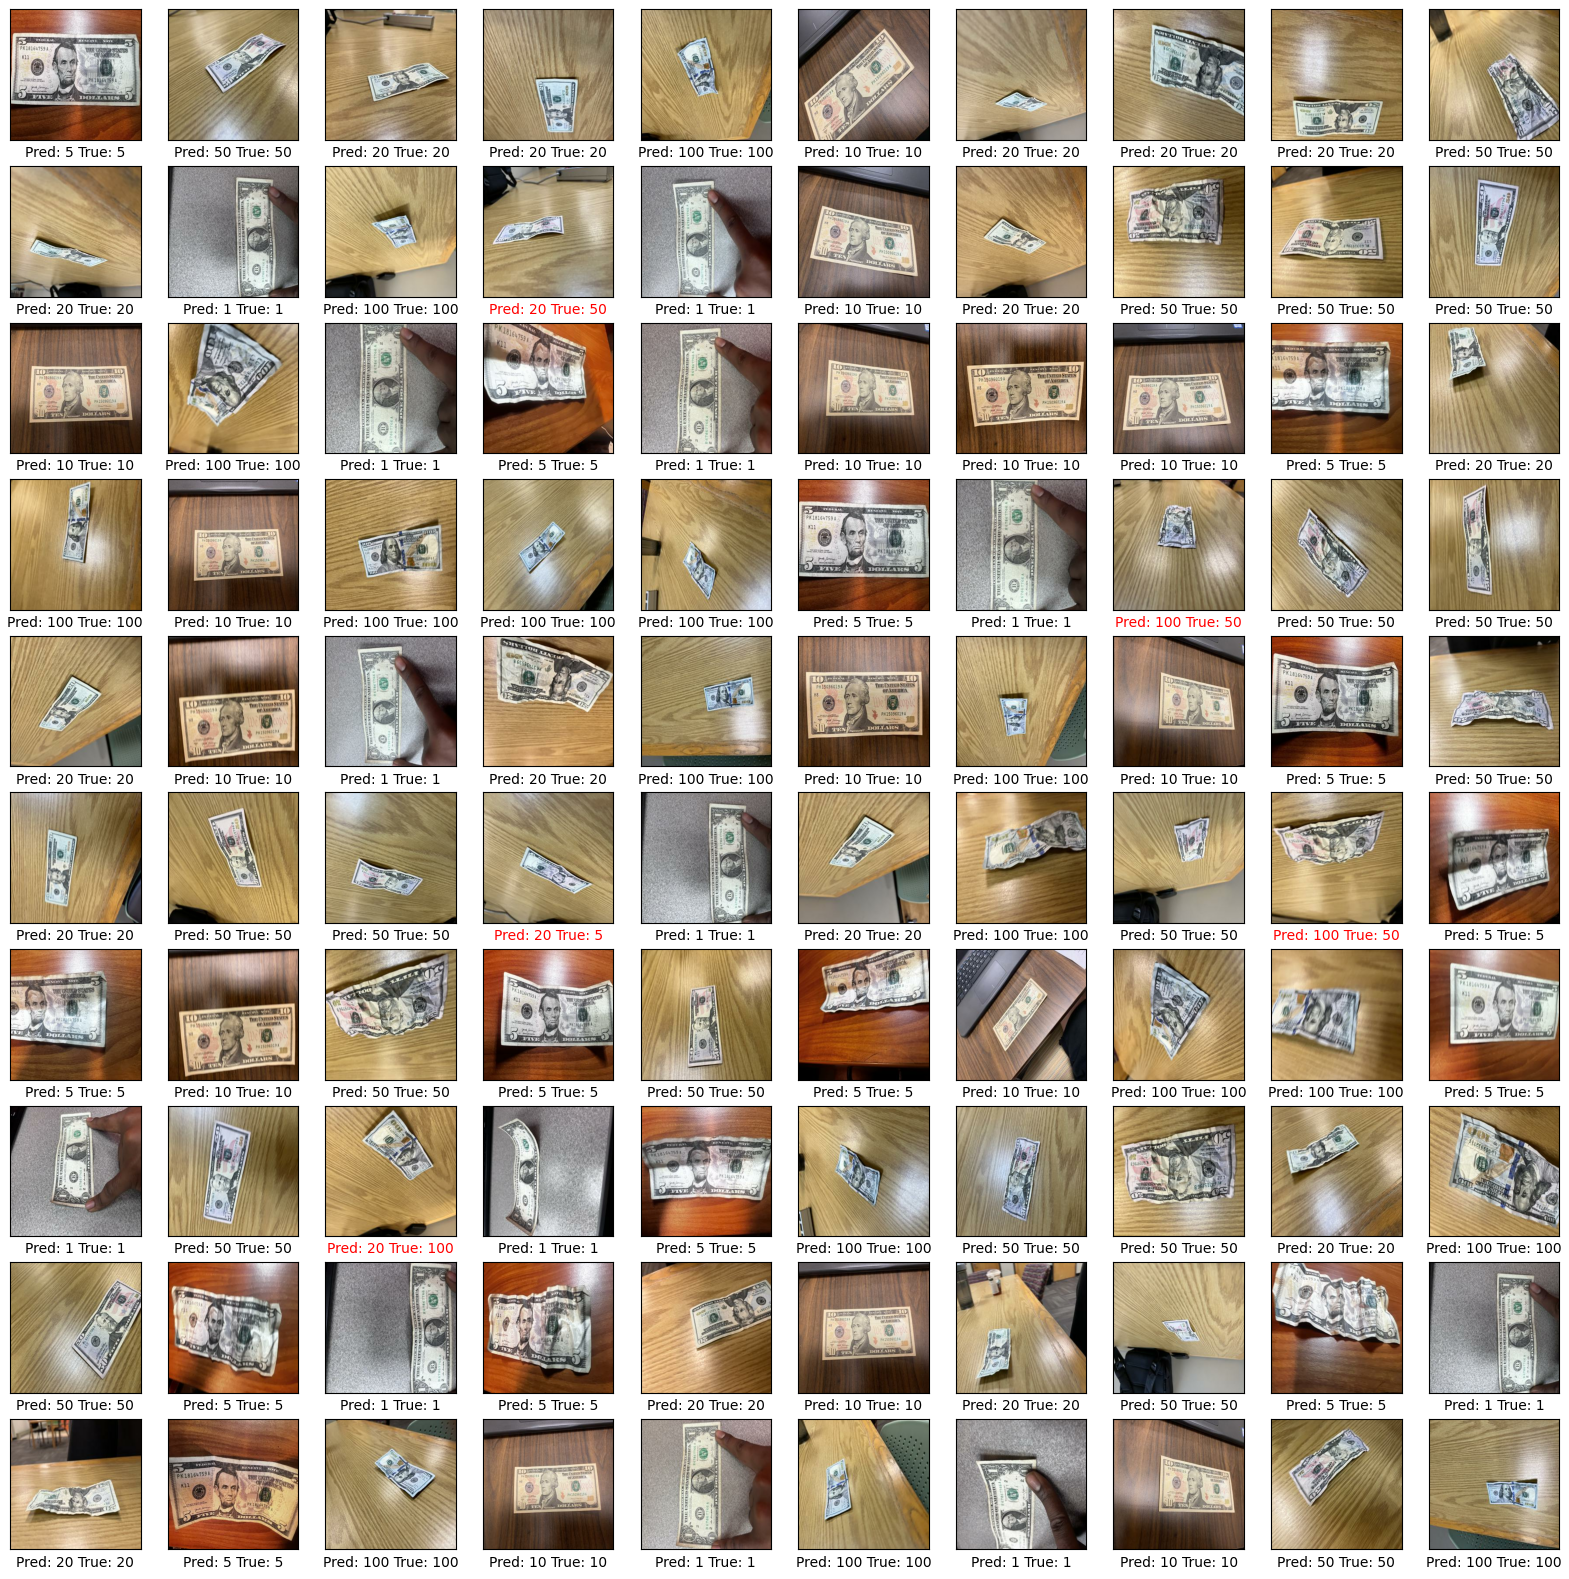

In [ ]:
# View the classification Examples
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Pred: %s True: %s' % (predict_label, test_data.index_to_label[label.numpy()]))
  #plt.title('True: %s' % test_data.index_to_label[label.numpy()])
plt.show()

Evalutaing the TFLite model with the "evaluate_tflite" method...

In [ ]:
# model.evaluate_tflite('model.tflite', test_data)
model_name = 'money_effnet0.tflite'
model.evaluate_tflite(model_name, test_data) #take a little bit long time ~ 10 min

{'accuracy': 0.9333333333333333}

For additional notes see Dr. Wang's GitHub page. 